Import libraries

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from metrics import print_evaluation_metrics

Load dataset and prepare df

In [9]:
file_path = "../data/parsed_dataset.csv"
date_column = "Date_reported"
target_column = "New_deaths"
df = pd.read_csv(file_path, parse_dates=True)
df = df.drop(columns=["Cumulative_deaths"])

df.set_index(date_column, inplace=True)
df = df.groupby(date_column).sum().reset_index()

date = df[date_column].values
df = df.select_dtypes(exclude=["object"])
df = df.dropna()


Train test split

In [10]:
train = df.iloc[:-30]
test = df.iloc[-30:]

Create the model

In [11]:
model = LinearRegression().fit(
    train.drop(columns=[target_column]), train[target_column]
)

pred = model.predict(test.drop(columns=[target_column]))
pred

array([1101.93312765, 1065.6593169 , 1065.5075182 , 1067.99323386,
       1071.79070665, 1561.70623161, 1136.09740906, 1134.46619661,
       1090.03798375, 1087.25242401, 1087.73978119, 1099.6952412 ,
       1105.53653569, 1166.90805633, 1177.12561355, 1117.36421313,
       1116.16630288, 1120.01846793, 1122.36357398, 1128.9494232 ,
       1193.56753018, 1216.45565947, 1146.07465891, 1144.94821596,
       1135.53462534, 1138.75233382, 1139.31180124, 1141.70384903,
       1145.67136921, 1149.6388894 ])

Plot the result

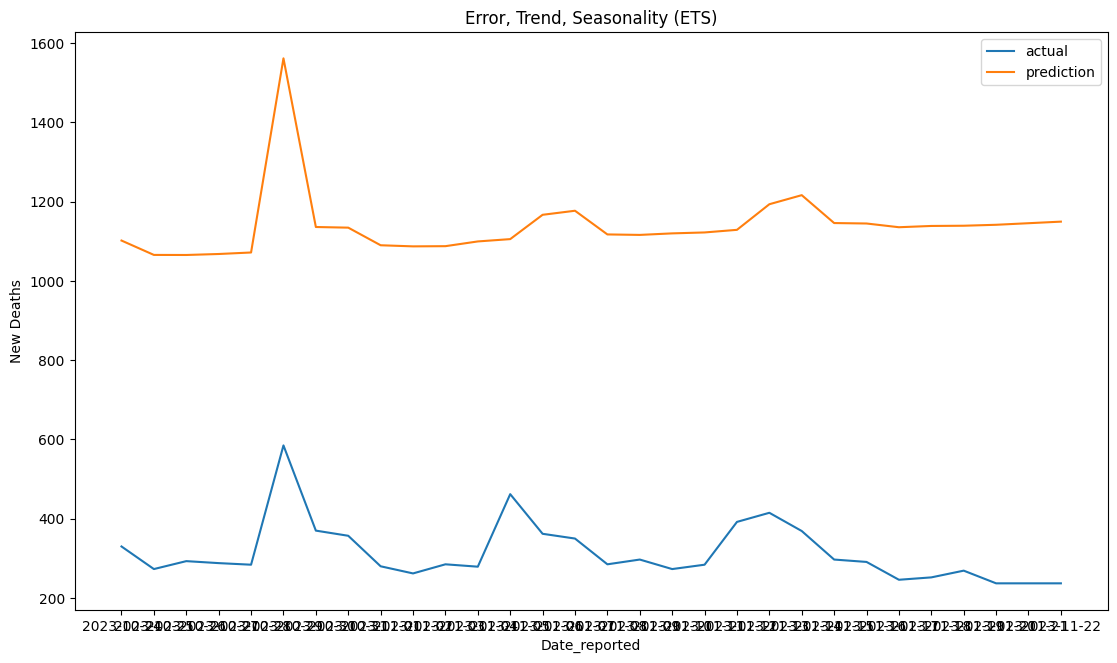

In [12]:
import numpy as np

fig, ax = plt.subplots(1, 1, figsize=(1280 / 96, 720 / 96))
ax.plot(date[-30:], test[target_column].values, label="actual")
ax.plot(date[-30:], pred, label="prediction")
ax.set_title("Error, Trend, Seasonality (ETS)")
ax.set_ylabel("New Deaths")
ax.set_xlabel(date_column)
ax.legend()
plt.show()

RMSE of the result

In [13]:
print_evaluation_metrics(pred, test[target_column].values)

Evaluation Metrics:
MSE: 683681.51
RMSE: 826.85
MAE: 824.50
MAPE: 275.04
SMAPE: 114.25
